# Example 1. Exploratory Data Analysis (EDA)
---
| **Name** | **Meaning** 
| :---: | :--- |
| **CRIM** | Rate of crime
| **ZN**   | Rate of residential zone (>25,000 $m^2$)
| **INDUS**| Rate of business zone
| **CHAS** | Location saperating by Chailes rive
| **NOX**  | Density of NO
| **RM**   | Average room per resident
| **AGE**  | Age of house
| **DIS**  | Distance to Boston working zone
| **RAD**  | Rate of conviniece for using high-speed-way
| **TAX**  | Rate of price/housing-tax (in \$10,000)
| **PTRATIO** | Rate of student/teacher
| **B** | $1000(Bk-0.63)^2$, where $Bk$ is rate of Africa people
| **LSTAT** | Rate of lower-economic population
| **MEDV** | Price of housing (in \$1,000)
**1\. Load Boston Housing data**

In [1]:
import matplotlib
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
df =  pd.DataFrame( data=boston.data )
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = boston.target

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**2\. First use ``seaborn`` API to show plots**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

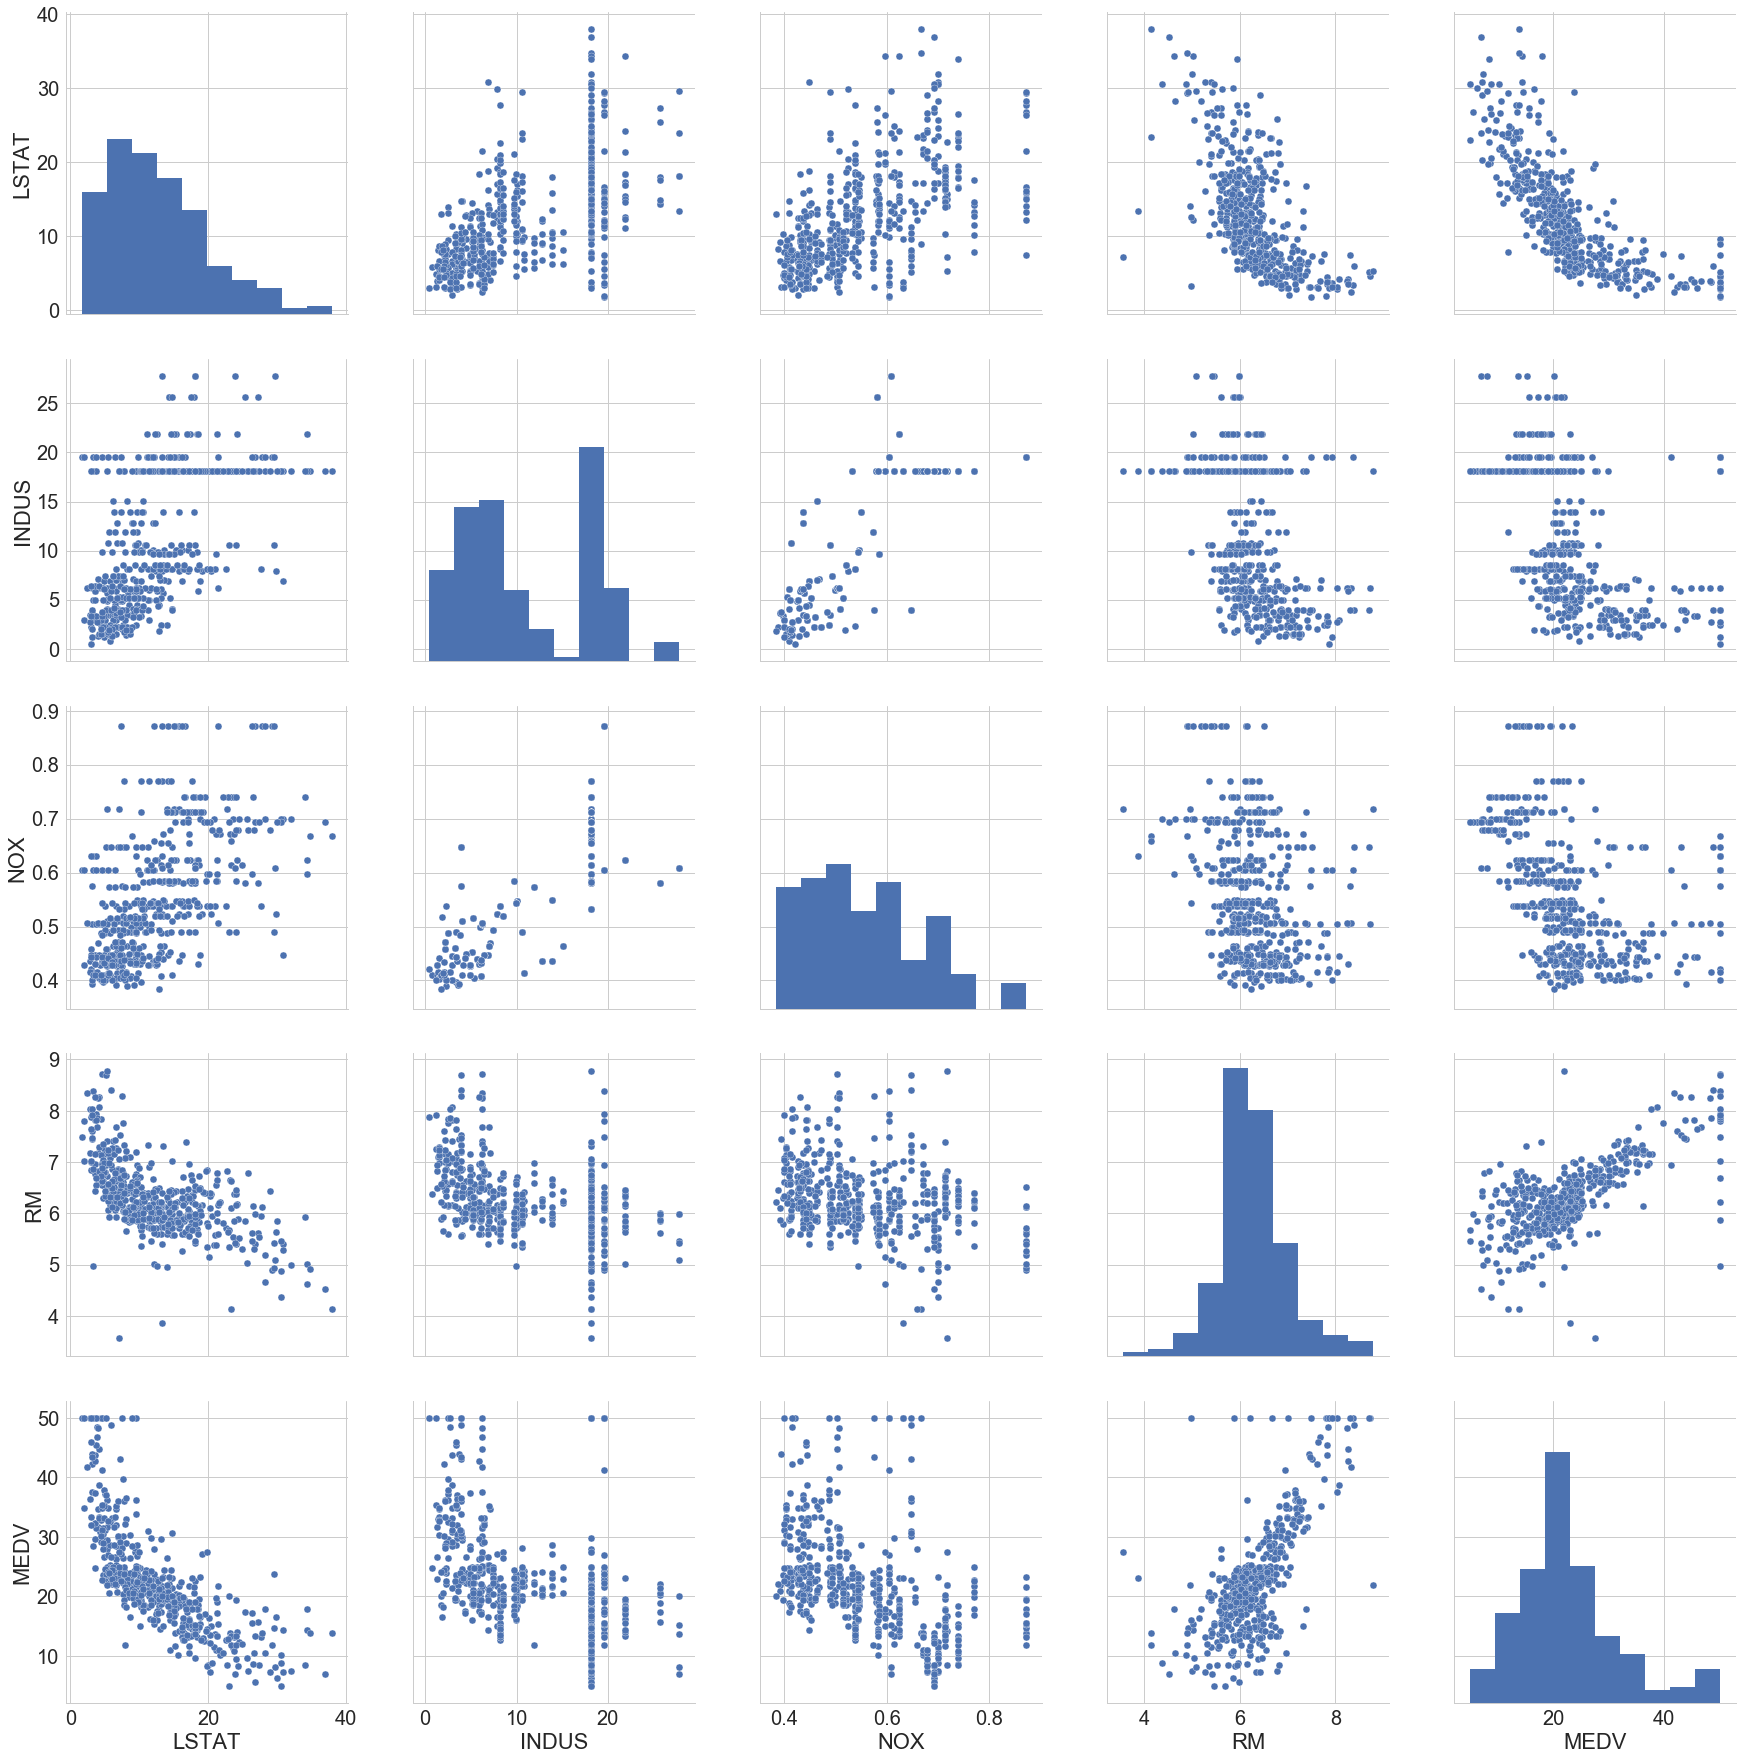

In [5]:
# Show correlation between each other
sns.set(style='whitegrid', context='notebook', font_scale=2)
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV' ]
sns.pairplot(df[cols], size=5)
plt.show()

In [6]:
# Generate single histogram & scatter plots
# Note : close() figure always, since seaborn will consume memory
plt.ioff() # turn off show()
for idx1, var1 in enumerate(list(df)):
    print var1+'....'
    plt.figure(figsize=(10, 8))
    sns.distplot(df[var1], kde=False, rug=False);
    plt.savefig('./figs/hist_%s.%s'%( var1,'png') )
    plt.close() 
    
    for idx2 in range(idx1+1, len(df.columns)):
        var2 = df.columns[idx2]
        corr = np.corrcoef(df[var1], df[var2])[0,1]
        sns.jointplot(x=var1, y=var2, data=df, size=10, color='g' if abs(corr) < 0.6 else 'r')
        plt.savefig('./figs/2D_Scatter_%s_%s.%s'%( var1, var2, 'png') )
        plt.close()
        

CRIM....
ZN....
INDUS....
CHAS....
NOX....
RM....
AGE....
DIS....
RAD....
TAX....
PTRATIO....
B....
LSTAT....
MEDV....


In [7]:
plt.ion() # Re-turn on the show()

**3\. Check the correlation of variables**

In [8]:
cm = np.corrcoef(df.values.T)
#print cm

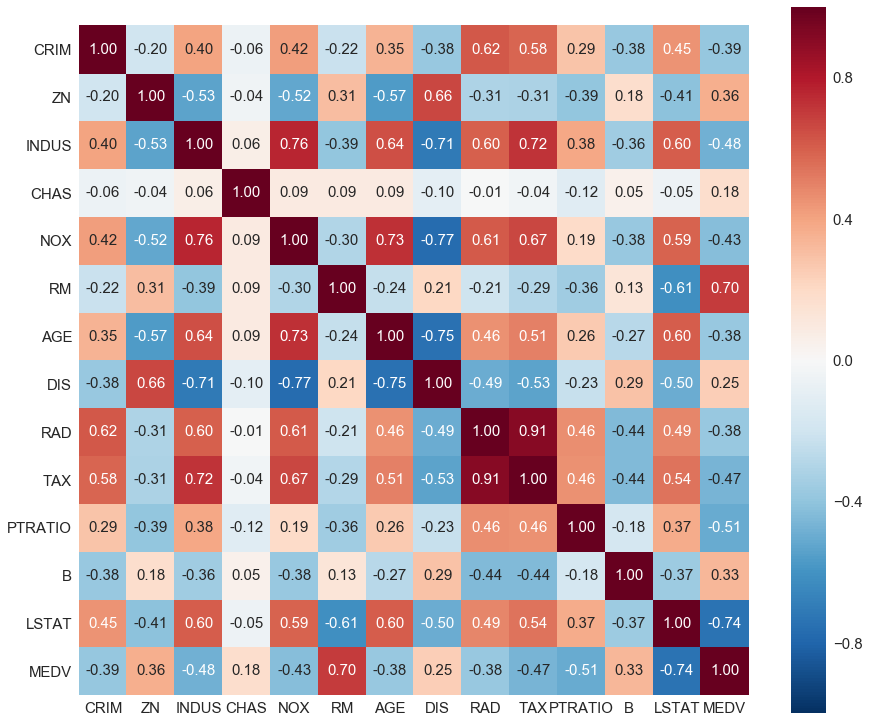

In [9]:
plt.figure(figsize=(15, 13))
labels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.set(font_scale=1.5)
sns.heatmap( cm, 
             cbar=True, 
             annot=True, 
             square=True, 
             fmt='.2f', 
             annot_kws={'size':15}, 
             yticklabels=labels, 
             xticklabels=labels)
plt.savefig('figs/correlation.png')

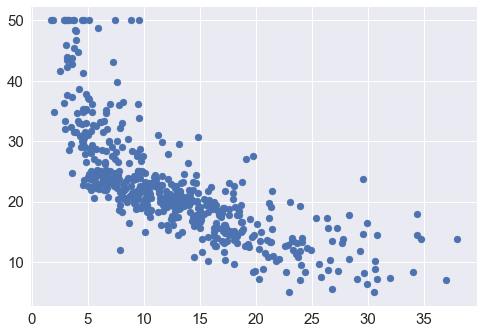

In [23]:
# LSTAT has larger correlation but looks not 1-order linear
plt.scatter(df[['LSTAT']], df['MEDV'])
plt.show()

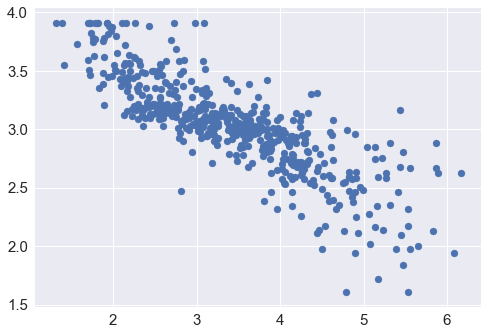

In [20]:
# Some feature can be transfer with mathmatical way 
X_sqrt = np.sqrt(df[['LSTAT']])
y_log = np.log(df['MEDV'])
plt.scatter( X_sqrt, y_log ) 
plt.show()

In [21]:
cm = np.corrcoef( X_sqrt.T, y_log )
print cm

[[ 1.         -0.82502379]
 [-0.82502379  1.        ]]
